In [6]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms



In [7]:
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  7


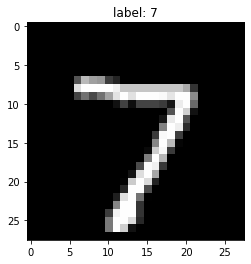

In [9]:
print("mnist_test 길이:", len(mnist_test))

# 데이터 하나 형태
image, label = mnist_test.__getitem__(0) # 0번째 데이터
print("image data 형태:", image.size())
print("label: ", label)

# 그리기
img = image.numpy() # image 타입을 numpy 로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
def softmax(x):
    e_x = np.exp(x)
    return e_x/np.sum(e_x)

In [15]:
class MyMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        # W&(1): layer1 -> layer2 에 매핑되는 Weight
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32) # W1(256, 28*28)
        self.b1 = np.zeros((n_hidden1,), dtype=np.float32)
        
        self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32) # W2(128, 256)
        self.b2 = np.zeros((n_hidden2,), dtype=np.float32)
        
        self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32) # W3(10, 128)
        self.b3 = np.zeros((n_output), dtype=np.float32)
    
    def __call__(self, x):
        # (1,28,28) -> (28*28)
        x = x.reshape(-1) # 일렬로 피기
        
        h1 = sigmoid(np.dot(self.W1, x) + self.b1)
        h2 = np.dot(self.W2, h1) + self.b2
        out = np.dot(self.W3, h2) + self.b3
        
        return softmax(out)

In [16]:
model = MyMLP(28*28, 256, 128, 10)

In [17]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


In [19]:
weights = np.load('./nets/mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

In [20]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


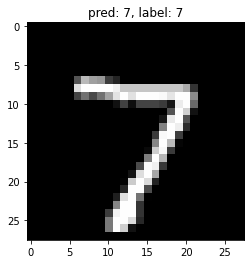

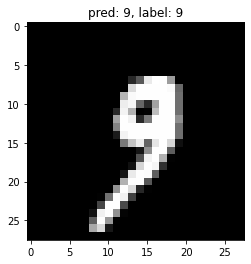

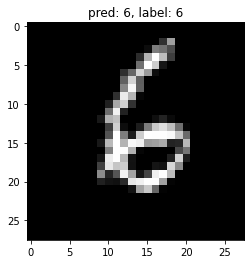

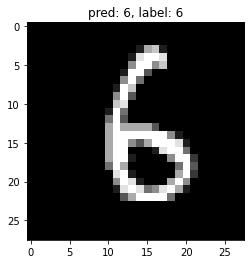

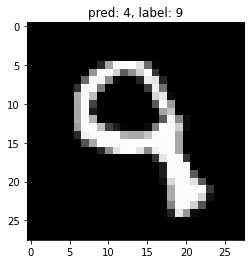

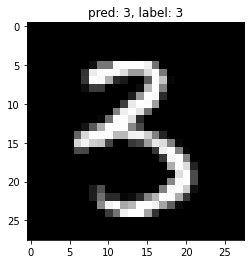

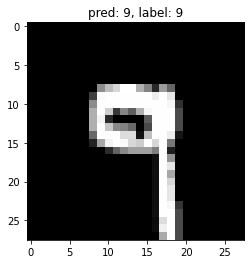

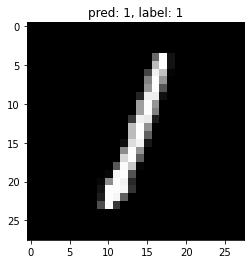

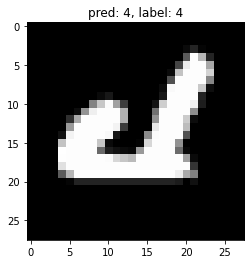

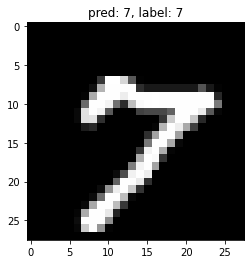

정확도: 91.91


In [22]:
mysum = 0
m = len(mnist_test)
cnt = 0
for i in range(m):
    image, label = mnist_test.__getitem__(i)
    output = model(image)
    
    if(i%1000==0):
        img = image.numpy()
        pred_label = np.argmax(output)
        plt.title("pred: %d, label: %d" %(pred_label, label))
        plt.imshow(img[0], cmap='gray')
        plt.show()
        
    cnt += 1
    mysum += (np.argmax(output) == label)

print("정확도: %.2f" %((float(mysum)/cnt)*100.0))